---
title: "Unsupervised Learning"
format:
    html: 
        toc: true
        code-fold: false
        embedded-resouces: true
---

# Introduction and Motivation  

This analysis employs **unsupervised learning** techniques—including **Principal Component Analysis (PCA)**, **t-Distributed Stochastic Neighbor Embedding (t-SNE)**, **K-Means**, **DBSCAN**, and **Hierarchical Clustering**—to examine the **Illinois exoneration dataset**. The primary objective is to identify patterns and hidden structures within the data, particularly focusing on how case characteristics, demographic variables (such as race and county), and the number of years lost to wrongful convictions intersect.  

The analysis is structured as follows:  
1. **Dimensionality Reduction**: Methods such as PCA and t-SNE are utilized to project high-dimensional data into lower-dimensional spaces, simplifying the visualization of complex relationships while preserving key structural and variance-based insights.  

2. **Clustering**: Clustering techniques—**K-Means**, **DBSCAN**, and **Hierarchical Clustering**—are applied to uncover natural groupings within the dataset and assess whether these clusters align with demographic features like race or case-related factors.  

3. **Evaluation and Interpretation**: The performance of each method is evaluated, and clustering results are compared to draw meaningful interpretations. Visualizations are integrated throughout the analysis to enhance clarity and support findings.  

The motivation for this analysis stems from the critical need to uncover systemic patterns in wrongful conviction data. By applying unsupervised learning methods, the investigation aims to reveal relationships and disparities between demographic factors and case outcomes that are not immediately apparent. These insights contribute to a deeper understanding of biases and inequities within exoneration cases and support broader efforts for justice system reform.  


# Data Preprocessing
The data preprocessing stage prepares the **Illinois exoneration dataset** for dimensionality reduction and clustering. This step involves selecting relevant features, encoding categorical variables, and standardizing numerical features to ensure compatibility with unsupervised learning algorithms.  

#### Feature Selection  
The features chosen for this analysis include a combination of **numerical** and **categorical** variables. The numerical variables—**age**, **sentence in years**, and **years lost**—were selected to provide quantitative insights into exoneration cases, such as the age at conviction, the length of imprisonment, and the total number of years lost. The categorical variable **race** was included to capture demographic patterns and be used as a **color vector** during visualization to assess how the identified clusters align with racial groupings.  

The selected features are as follows:  
- **Numerical**: `age`, `sentence_in_years`, `years_lost`  
- **Categorical**: `race`  

#### Standardization and Encoding  
To ensure that numerical features contribute equally to the analysis, they were standardized using **StandardScaler**. Standardization adjusts each numerical feature to have a mean of 0 and a standard deviation of 1, preventing variables like sentence lengths from dominating the clustering process. The categorical variable **race** was encoded using **Label Encoding**, which assigns a numerical value to each category (e.g., race). This transformation ensures compatibility with algorithms such as **K-Means**, **DBSCAN**, and **Hierarchical Clustering** that require numerical inputs for processing.  

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../../data/processed-data/illinois_exoneration_data.csv')

# Select features of interest
features = ['age', 'sentence_in_years', 'years_lost', 'race', 'county']
df = df[features].dropna()

# Encode categorical variables
le_race = LabelEncoder()
le_county = LabelEncoder()
df['race_encoded'] = le_race.fit_transform(df['race'])

# Standardize numerical variables
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['age', 'sentence_in_years', 'years_lost']])

X = scaled_features  # Already standardized

# Dimensionality Reduction
The objective of this section is to explore and demonstrate the effectiveness of PCA and t-SNE in reducing the dimensionality of complex data while preserving essential information and improving visualization.

## PCA (Principal Component Analysis)  

**Principal Component Analysis (PCA)** is a statistical technique used to reduce the dimensionality of high-dimensional datasets. It achieves this by identifying the most significant features, known as principal components, through linear transformations. These components capture the maximum variance in the data, allowing for a simplified yet informative representation of complex datasets.  


In [102]:
# ---------------------------------------------------------------
# Unsupervised Learning Implementation
# Principal Component Analysis (PCA) and clustering methods used
# in this code are based on demos and labs provided by:
#
# Hickman, J. (2024.). Principal Components Analysis and clustering.
# Georgetown University Centralized Lecture Content.
# Retrieved from: https://jfh.georgetown.domains/centralized-lecture-content/content/machine-learning/unsupervised-learning/dimensionality-reduction/PCA/notes.html#pca-vs-clustering
# ---------------------------------------------------------------

# Define utility plotting function
def plot_2D(X,color_vector, plot_title):
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1],c=color_vector, alpha=0.5) #, c=y
    ax.set(xlabel='PC-1 ', ylabel='PC-2',
    title= plot_title)
    ax.grid()
    # fig.savefig("test.png")
    plt.show()

# Define variance plot function to visualize variance explained by PCA components
def plot_variance_explained(pca):
    explained_variance_ratio = pca.explained_variance_ratio_

    # Plot explained variance ratio
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance ratio')
    plt.title('Explained Variance Ratio by Component')
    plt.show()

    # Plot cumulative explained variance
    cumulative_variance = np.cumsum(explained_variance_ratio)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance')
    plt.title('Cumulative Explained Variance by Component')
    plt.show()


### Explained Variance Ratio
The explained variance ratio in PCA indicates the proportion of the total variance in the dataset that is captured by each principal component (PC). This metric is essential for determining the optimal number of components to retain during dimensionality reduction. Each principal component captures a fraction of the total variance, with the first principal component (PC-1) explaining the largest share, followed by the second component (PC-2), and so forth. By analyzing the distribution of variance across the components, it becomes possible to identify which components contribute the most meaningful information to the dataset.  The cumulative variance** is calculated by summing the explained variance ratios of successive components. This cumulative measure helps determine how many components are necessary to retain a significant portion of the total variance, such as 90% or 95%. Retaining fewer components simplifies the data representation, making it more computationally efficient, while still preserving most of the underlying structure and variability of the original dataset.  


Variance explained by each principal component:
[0.59465697 0.29997716 0.10536587]

Cumulative variance explained by each principal component:
[0.59465697 0.89463413 1.        ]


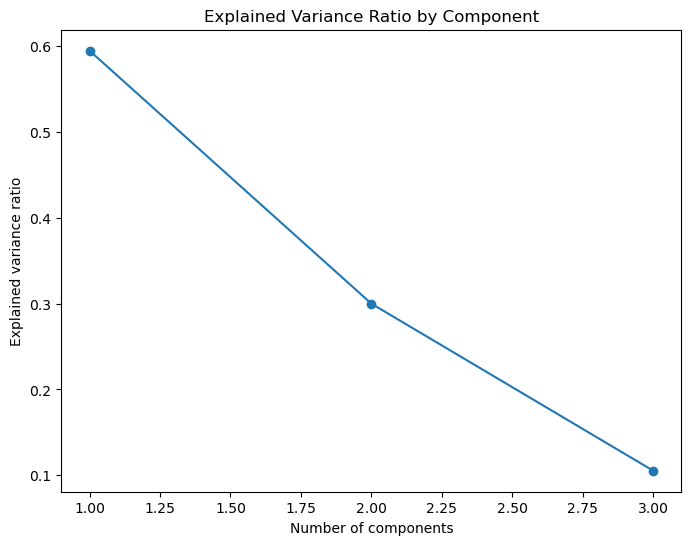

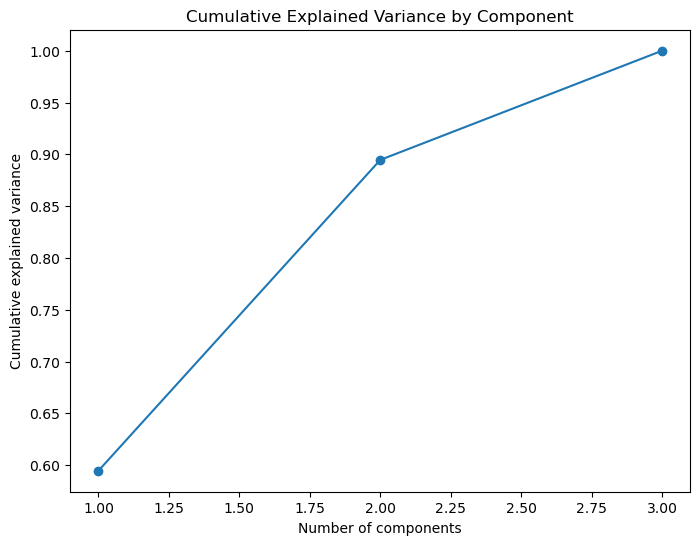

In [81]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Print variance explained and cumulative variance by each principal component
print("Variance explained by each principal component:")
print(pca.explained_variance_ratio_[:10])

print("\nCumulative variance explained by each principal component:")
print(np.cumsum(pca.explained_variance_ratio_)[:10])

# Plot the variance explained
plot_variance_explained(pca)


The first plot, **"Explained Variance Ratio by Component,"** shows the proportion of variance captured by each principal component. The steep decline in this plot indicates that the **first principal component (PC-1)** explains the largest portion of the variance, followed by the **second component (PC-2)**. After these first two components, the additional variance explained by subsequent components decreases significantly. This behavior suggests that the majority of the dataset's structure can be captured by the first two components.  

The second plot, **"Cumulative Explained Variance by Component,"** illustrates the total variance explained as additional components are added. The curve rises sharply at the start, with the **first two components** capturing approximately **90% of the total variance**. Beyond the second component, the curve begins to flatten, indicating diminishing returns. This flattening demonstrates that including more components contributes little new information to the overall representation of the data.  

Together, these plots emphasize the significance of the first two principal components. By focusing on these components, the dimensionality of the data can be effectively reduced while retaining most of its variance. This reduction simplifies computations, decreases model complexity, and enhances the interpretability of visualizations, all without sacrificing critical information.  

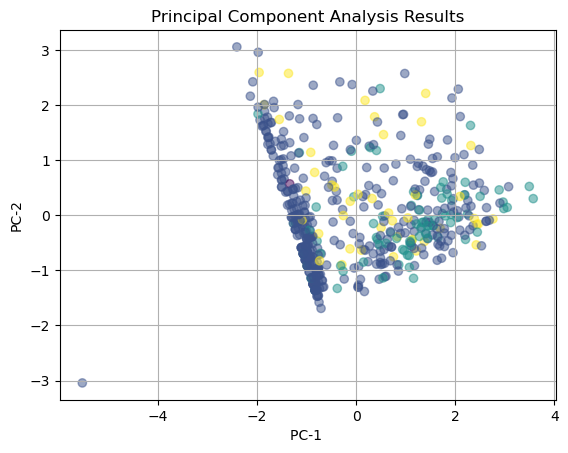

In [101]:
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X)

# Step 5: Plot 2D results
plot_2D(X_pca_2, df['race_encoded'], 'Principal Component Analysis Results')

The plot, **"Principal Component Analysis Results,"** presents the dataset reduced to two dimensions—**PC-1** and **PC-2**—the two principal components that capture the most variance. Each point represents an individual data observation, with colors corresponding to the `race_encoded` variable.  

- **PC-1 (x-axis)** captures the largest portion of the variance, approximately **60%**.  
- **PC-2 (y-axis)** explains the next largest portion, around **30%**.  

The distribution of points shows that much of the variance is concentrated along the **PC-1 axis**, suggesting that this direction captures the most meaningful structure in the dataset. The spread along the **PC-2 axis** provides additional separation, though to a lesser extent. The presence of vertical "striping" and overlapping points indicates that the `race_encoded` variable (color-coded) does not perfectly align with the variance explained by the first two components. This observation suggests that the numerical features—**`age`**, **`sentence_in_years`**, and **`years_lost`**—alone may not fully differentiate racial categories.  

In sum, PCA effectively reduces the dataset to two dimensions, capturing a significant portion of the variance. However, the clustering patterns observed suggest that race-based groupings may not be strongly linear within the numerical features. 

## t-SNE (t-distributed Stochastic Neighbor Embedding)  
**T-distributed Stochastic Neighbor Embedding (t-SNE)** is a non-linear dimensionality reduction technique designed for visualizing high-dimensional data in a low-dimensional space. It preserves local relationships within the data, making it particularly effective for identifying clusters and patterns that may not be visible in higher dimensions.  


Running t-SNE with perplexity=5


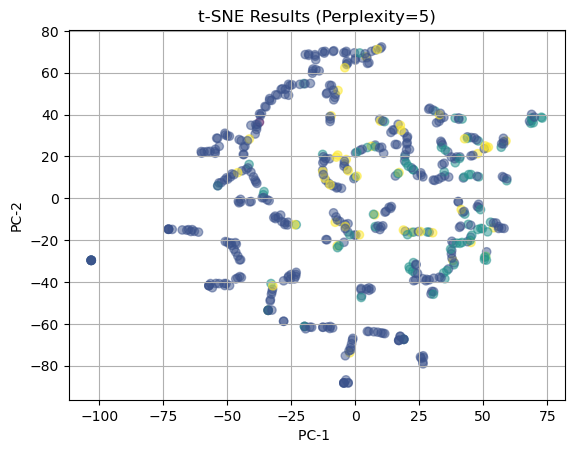

Running t-SNE with perplexity=30


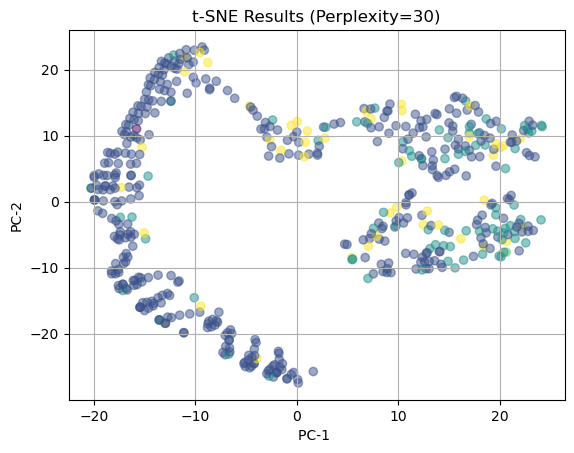

Running t-SNE with perplexity=50


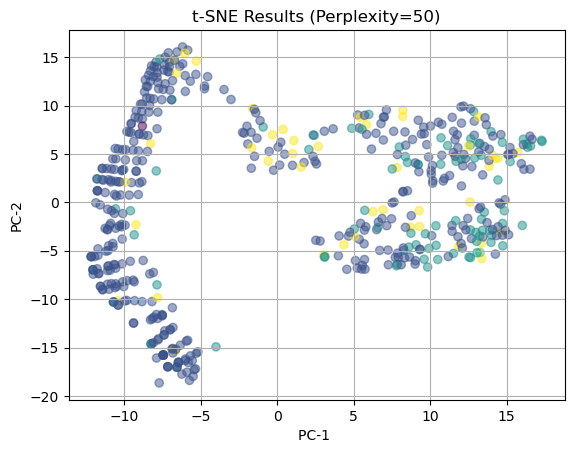

Running t-SNE with perplexity=100


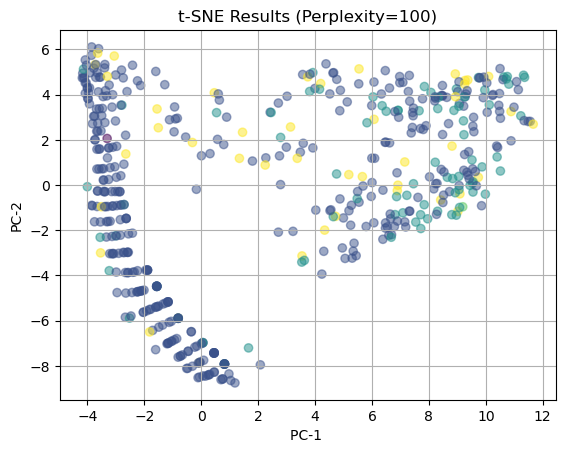

In [ ]:
# Test different perplexity values
perplexity_values = [5, 30, 50, 100]

for perplexity in perplexity_values:
    print(f"Running t-SNE with perplexity={perplexity}")
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    plot_2D(X_tsne, df['race_encoded'], f't-SNE Results (Perplexity={perplexity})')

The **t-SNE visualizations** were generated using perplexity values of **5, 30, 50, and 100** to examine how this parameter influences the clustering structure. Perplexity determines the balance between local and global relationships within the data, where lower values emphasize small neighborhoods and higher values capture broader patterns.  

At **perplexity = 5**, the plot reveals fragmented and overly localized clusters. While small neighborhoods are highlighted, the data appears disjointed, making it difficult to identify coherent global groupings. This behavior suggests that a perplexity of 5 is too low to capture meaningful structure.  

At **perplexity = 30**, the visualization becomes more organized, striking a balance between local and global structure. Clear regional groupings emerge, with smaller clusters visible alongside broader trends. This representation provides an interpretable and balanced view of the data.  

At **perplexity = 50**, the clustering appears more cohesive and distinct. The structure of the data is well-defined, and groupings are clearer compared to perplexity = 30. This value maintains a strong balance between fine-grained patterns and global structure, making it ideal for visualizing race-based patterns in the data.  

At **perplexity = 100**, the plot emphasizes global structure but sacrifices local details. Clusters become stretched horizontally, and smaller, fine-grained groupings are smoothed out. While broad relationships are highlighted, important insights from localized clusters are diminished.  

In conclusion, a perplexity value of **50** was selected as it produces the clearest and most cohesive clusters. This value preserves both local details and global structure, providing the optimal balance for identifying meaningful groupings and visualizing patterns related to race.  

### Comparison of PCA and t-SNE Results

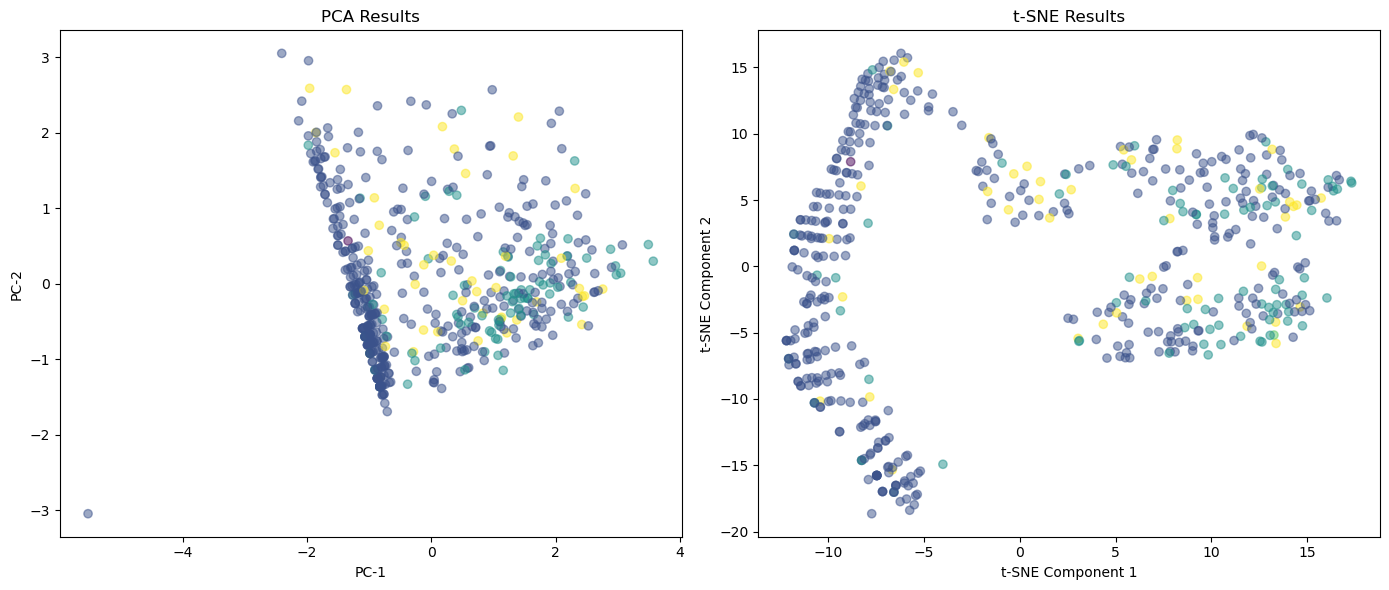

In [89]:
# Apply t-SNE with perplexity=50
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X)  # X is your standardized input data

# Side-by-side comparison: PCA vs t-SNE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA Plot
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=df['race_encoded'], alpha=0.5)
axes[0].set_title('PCA Results')
axes[0].set_xlabel('PC-1')
axes[0].set_ylabel('PC-2')

# t-SNE Plot
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['race_encoded'], alpha=0.5)
axes[1].set_title('t-SNE Results')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

The two plots above compare the results of **Principal Component Analysis (PCA)** and **t-SNE (perplexity = 50)** when applied to the same dataset. In the **PCA Results**, the data is reduced to two principal components that capture the directions of maximum variance. The points appear somewhat aligned along the **vertical axis (PC-1)**, indicating that the majority of the variance lies in that direction. However, the plot does not reveal clear or well-defined clusters, suggesting that PCA effectively captures **global variance patterns** but struggles to preserve **local neighborhood structures**. The visual separation by race (color-coded) is not particularly distinct in the PCA output.  Alternatively, **t-SNE Results** provide a more nuanced and detailed visualization. By balancing local and global relationships, t-SNE produces **more distinct clusters** and patterns with greater cohesion. The clusters are clearer and better separated, indicating that t-SNE excels at preserving the **local structure** of the data. Although some overlap remains, the t-SNE output reveals a structure that is significantly clearer compared to PCA, particularly when visualized using race-based color encoding. Overall, t-SNE (with perplexity = 50) outperforms PCA in uncovering patterns and potential clusters within the dataset. While PCA captures the global variance effectively, it fails to separate groups as clearly. This comparison highlights the advantage of **t-SNE** for visualizing **complex, high-dimensional data** where local relationships are particularly important.  


# Clustering Methods  

Clustering is an unsupervised learning technique used to identify natural groupings, or clusters, within a dataset. In clustering, the data is unlabeled, meaning there are no predefined classes or categories. The primary goal is to **discover groups of data points** that are similar to each other based on a defined measure of similarity or distance.  

In this analysis, **K-Means**, **DBSCAN**, and **Hierarchical Clustering** are applied to the dataset to:  
- Explore the structure of the data and identify meaningful clusters.  
- Compare the performance and outcomes of each clustering technique.  
- Interpret the results to gain insights into groupings and relationships within the data.  

By leveraging these methods, the analysis seeks to uncover patterns and hidden structures that may not be immediately apparent, providing a deeper understanding of the data.  

## K-Means  

K-Means is a foundational unsupervised clustering algorithm that partitions data into a predefined number of clusters, denoted as **K**. K-Means begins by randomly selecting `K` initial cluster centroids and assigns each data point to the closest centroid based on the Euclidean distance. The centroids are then recalculated as the mean of all data points within their respective clusters. This process of assignment and centroid adjustment repeats until the centroids stabilize or a convergence criterion is reached. The goal of K-Means is to group data into clusters that are both cohesive and well-separated—where distances within each cluster are minimized, and distances between clusters are maximized. While K-Means performs effectively when clusters are spherical and well-defined, it requires specifying the number of clusters (`K`) in advance, which introduces the need for hyperparameter tuning.  

### Elbow Method  
To identify the optimal number of clusters, the **Elbow Method** and **Silhouette Score** are employed. The **Elbow Method** involves plotting the point where the rate of inertia reduction slows, indicating the optimal number of clusters, as adding more clusters beyond it provides diminishing returns in variance reduction.  The **Silhouette Score** offers an additional measure to assess clustering quality by evaluating how similar each data point is to its own cluster compared to other clusters. Higher Silhouette Scores indicate clusters that are well-defined and more cohesive, providing a clearer structure within the data.  

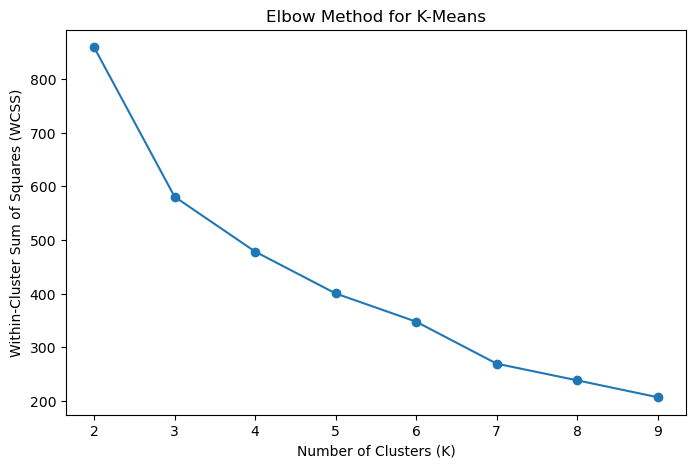

In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Range for number of clusters
k_values = range(2, 10)
wcss = []
silhouette_scores = []

# Find optimal K using WCSS and silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)  # Assuming X is the 2D data (e.g., PCA or t-SNE)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, '-o')
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.show()


In the **Elbow Method** plot above, the inertia decreases sharply up to around **K = 4 or K = 5**, after which the curve begins to flatten. This behavior suggests that the optimal number of clusters lies between **4 and 5**. By combining insights from both the **Elbow Method** and the **Silhouette Scores**, the best value for `K` can be confidently selected. Visualizing the clustering results further allows for assessing their alignment with meaningful patterns within the data.  

### Visualize Clusters for Optimal K

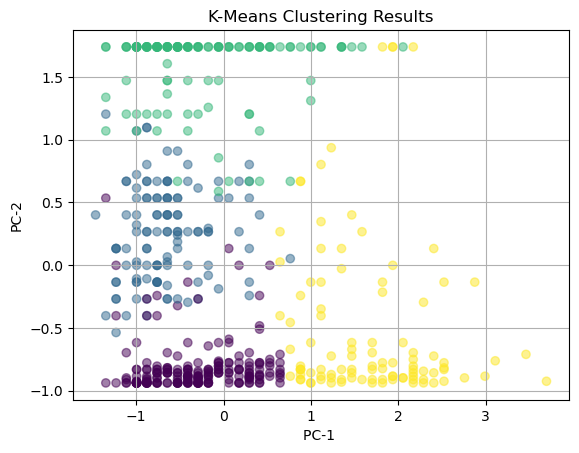

In [99]:
# Visualize Clusters for Optimal K
optimal_k = 4  # Replace with the K identified using the elbow point
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels_kmeans = kmeans.fit_predict(X)
plot_2D(X, labels_kmeans, 'K-Means Clustering Results')

The visualization above displays the results of K-Means clustering applied with an optimal value of **K = 4**, as determined using the Elbow Method. The data has been projected onto the first two principal components (PC-1 and PC-2) for visualization, with each point color-coded based on its cluster assignment.  

The clusters appear well-separated and exhibit distinct patterns along the two principal components:  

1. The **yellow cluster** occupies the far right of the **PC-1 axis**, indicating that this group has unique characteristics that distinguish it from the others.  
2. The **purple cluster** is concentrated at the bottom of the plot, suggesting that it shares common features that set it apart, particularly along **PC-2**.  
3. The **teal and blue clusters** are more centered with slight overlap, reflecting some shared attributes while still maintaining discernible boundaries.  

The choice of **K = 4** aligns well with the structure of the exoneration dataset, where race emerged as a key factor during Exploratory Data Analysis (EDA). The racial groups initially considered included **Black, Hispanic, White, Native American, and Asian**. However, the **Asian group** was excluded due to its negligible presence in the dataset, making four clusters a logical and meaningful choice. This outcome mirrors the underlying data distribution, where the remaining racial groups are clearly represented in the clustering results.  

These findings suggest that K-Means effectively partitions the data into four meaningful clusters based on the selected features. The clear separation of clusters along **PC-1 and PC-2** highlights that these principal components successfully capture the variance in the data, enabling the differentiation of racial groupings. The slight overlap between clusters may stem from shared attributes across groups or limitations in the chosen features.  

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)  

DBSCAN is an unsupervised clustering algorithm that groups data points based on density. Unlike K-Means, which requires specifying the number of clusters in advance, DBSCAN identifies clusters by locating dense regions in the data while marking points in less dense areas as noise. This makes it particularly effective for identifying clusters of arbitrary shapes and handling outliers. DBSCAN relies on two key parameters:  

1. **`eps`**: The maximum distance between two points for them to be considered part of the same neighborhood.  
2. **`min_samples`**: The minimum number of points required to form a dense region (a cluster).  

DBSCAN begins with an unvisited point and determines its neighborhood within the radius **`eps`**. If the number of points in the neighborhood meets or exceeds **`min_samples`**, a cluster is initiated. The cluster is then expanded by iteratively including points within **`eps`** distance of other points already in the cluster. Points that do not meet the density requirement are labeled as **noise** (outliers).  

One of the key strengths of DBSCAN is its ability to **detect clusters of varying shapes** and handle datasets with **noisy or irregular boundaries**. Additionally, it does not force every point into a cluster, which allows for the identification of outliers—a feature particularly useful for understanding anomalies within the data. However, selecting appropriate values for **`eps`** and **`min_samples`** is critical to DBSCAN's performance. A common strategy involves experimenting with different **`eps`** values and assessing the results using metrics such as the **Silhouette Score**.  

By leveraging DBSCAN, the analysis can uncover nuanced structures in the dataset that may not be apparent with algorithms like K-Means, offering deeper insights into hidden patterns and systemic disparities.  

### Eps Hyper-Parameter Tuning

EPS: 0.5, Silhouette Score: 0.1970450363722957


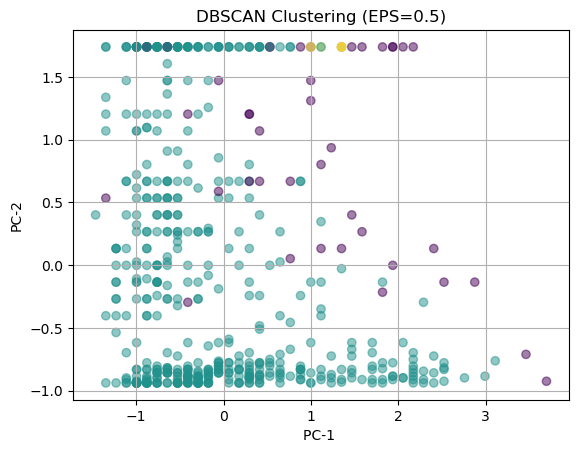

EPS: 1.0, Silhouette Score: 0.7808945570083328


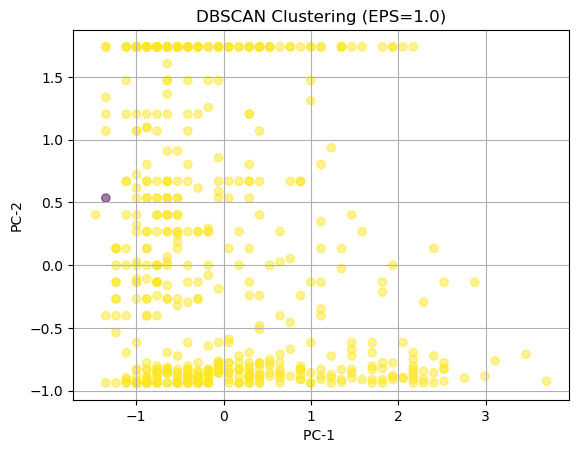

EPS: 1.5, Silhouette Score: 0.7808945570083328


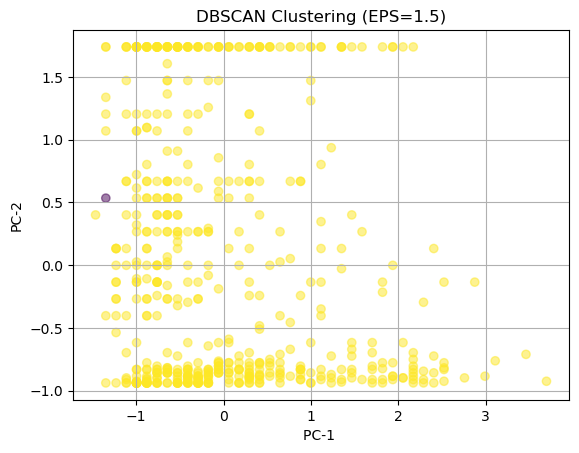

EPS: 2.0, Silhouette Score: 0.7808945570083328


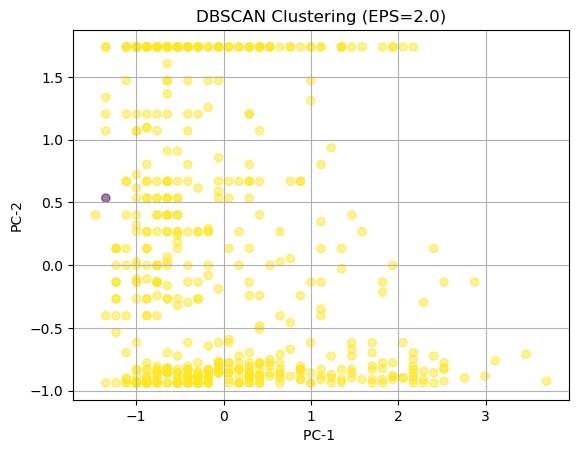

In [93]:
from sklearn.cluster import DBSCAN

# Test different eps values for DBSCAN
eps_values = [0.5, 1.0, 1.5, 2.0]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels_dbscan = dbscan.fit_predict(X)
    try:
        sil_score = silhouette_score(X, labels_dbscan)
        print(f"EPS: {eps}, Silhouette Score: {sil_score}")
    except:
        print(f"EPS: {eps}, Silhouette Score: Undefined (noise present)")

    # Visualize Clusters
    plot_2D(X, labels_dbscan, f'DBSCAN Clustering (EPS={eps})')


The **`eps` values** for DBSCAN were selected by testing a range of values (**0.5, 1.0, 1.5, and 2.0**) to analyze the algorithm's sensitivity to this key parameter. DBSCAN uses **`eps`** (neighborhood radius) and **`min_samples`** to define dense regions, where `eps` controls the size of these regions. Smaller values of `eps` result in fragmented clusters, while larger values produce fewer, broader clusters. The chosen values allow for an incremental evaluation of how clustering changes to identify the best balance between **fragmentation** and **cohesion**.  

1. **EPS = 0.5**  
   - At **`eps = 0.5`**, the clusters are highly fragmented, with a significant number of points labeled as **noise** (not assigned to any cluster). The neighborhood radius is too small to form large, cohesive clusters.  
   - The **Silhouette Score** is **0.197**, indicating poor clustering performance with high intra-cluster variance. The results lack meaningful structure and cohesion.  

2. **EPS = 1.0**  
   - With **`eps = 1.0`**, clustering performance improves significantly. More points are grouped into clusters, dense regions become apparent, and the number of noise points is reduced.  
   - The **Silhouette Score** rises to **0.78**, reflecting well-defined clusters and clear separation between groups. At this value, the algorithm strikes a good balance between cohesive clusters and noise reduction.  

3. **EPS = 1.5**  
   - At **`eps = 1.5`**, the clustering results remain largely similar to those observed at `eps = 1.0`. Most data points are grouped into a single large cluster, with only a small number of points remaining on the periphery.  
   - The **Silhouette Score** remains stable at **0.78**, but expanding the neighborhood radius further does not uncover additional structure in the data.  

4. **EPS = 2.0**  
   - When **`eps = 2.0`**, nearly all points are assigned to a single large cluster. While this eliminates noise points, it oversimplifies the data and removes meaningful structural separation.  
   - Although the Silhouette Score remains consistent, the clustering lacks distinct groupings, indicating that `eps = 2.0` is too large for this dataset.  

The analysis of DBSCAN results demonstrates that **`eps = 1.0`** provides the best clustering performance. At this value, the clusters are **well-defined**, noise is minimized, and the **Silhouette Score** achieves a peak of **0.78**. Smaller `eps` values, such as **0.5**, lead to fragmented clusters with excessive noise, while larger values, such as **1.5** and **2.0**, smooth the data excessively, reducing meaningful separation. Thus, **`eps = 1.0`** emerges as the optimal choice, balancing noise reduction with cohesive and interpretable clustering results. 

## Hierarchical Clustering  

Hierarchical Clustering is an unsupervised machine learning algorithm that builds a hierarchy of clusters through an iterative process. Unlike **K-Means**, which requires specifying the number of clusters in advance, hierarchical clustering produces a **dendrogram**—a tree-like structure that shows how data points are grouped at different levels of granularity. The algorithm can follow two main approaches: **agglomerative** (bottom-up) and **divisive** (top-down). In **agglomerative clustering**, each data point starts as its own cluster. Clusters are progressively merged based on their similarity (distance), defined by the linkage method. This analysis uses **Ward’s linkage**, which minimizes intra-cluster variance at each step, resulting in well-balanced and cohesive clusters. The dendrogram serves as a visual tool to identify the optimal number of clusters by "cutting" the tree at a height where clusters are most distinct. This makes hierarchical clustering particularly effective for EDA, as it does not require prior knowledge of the number of clusters.  

To determine the optimal clusters, the dendrogram was examined for large vertical distances, indicating well-separated groups. Ward’s linkage ensures minimal intra-cluster variance, producing compact and interpretable groupings—an essential property for datasets like the exoneration data, where clear separations between groups are critical. Hierarchical clustering with **Ward’s linkage** offers a flexible and interpretable approach for uncovering the dataset’s structure. By analyzing the dendrogram and selecting the appropriate height, meaningful clusters were identified. Compared to **K-Means** and **DBSCAN**, hierarchical clustering provides the additional benefit of visualizing relationships between clusters, making it a valuable method for validating and interpreting clustering results.  


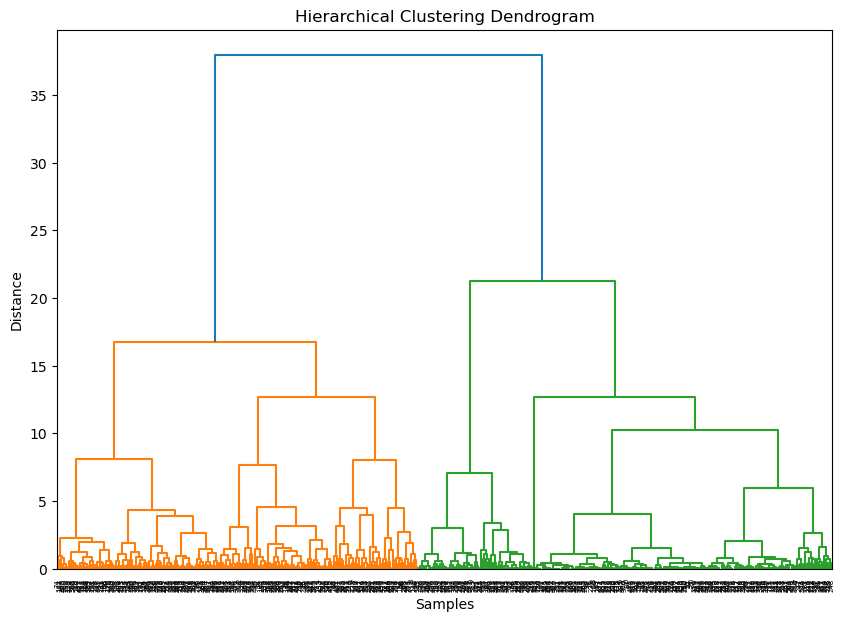

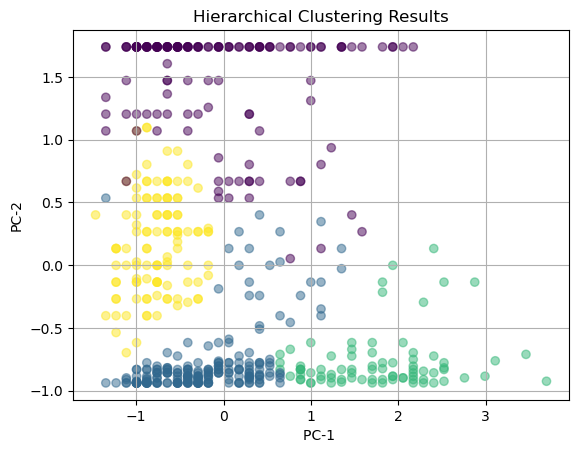

In [94]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Create Dendrogram
linkage_matrix = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering for chosen number of clusters
n_clusters = 4  # Replace with the number identified using the dendrogram
agglom = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_agglom = agglom.fit_predict(X)

# Visualize Clusters
plot_2D(X, labels_agglom, 'Hierarchical Clustering Results')



### Hierarchical Clustering Results Interpretation  

The dendrogram above visually represents the clustering hierarchy generated using **Ward’s linkage** in hierarchical clustering. The dendrogram shows how data points are progressively merged into clusters at varying distances. By **cutting the dendrogram** at an appropriate height, **four clusters** are identified, which align with the patterns observed in the earlier **K-Means results**.  

The **Hierarchical Clustering Results** plot projects these clusters onto the first two principal components (PC-1 and PC-2), with data points color-coded based on their cluster assignments:  
1. **Purple Cluster**: Positioned at the **top of the PC-2 axis**, this group stands out distinctly, indicating unique features that strongly separate it along PC-2.  
2. **Yellow Cluster**: Spread vertically across the **middle region** of PC-1, this cluster shows moderate cohesion while spanning a wide range along PC-2.  
3. **Teal Cluster**: Concentrated toward the **bottom-right**, this group is more compact and well-defined along PC-1, suggesting strong intra-cluster similarity.  
4. **Blue Cluster**: Located in the **bottom-left region**, this group appears dense and cohesive, with relatively low variation along PC-2.  

The dendrogram supports the selection of **four clusters**, evidenced by clear separations into branches at a distance of approximately **20 units**. These clusters are well-defined and consistent with the natural groupings observed in the data, particularly along PC-1 and PC-2. Compared to other clustering methods, hierarchical clustering offers a notable advantage by providing a hierarchical structure for cluster exploration. This allows for the analysis of groupings at multiple levels of granularity, enhancing the interpretability of the results. Overall, hierarchical clustering confirms the patterns identified in the **K-Means results**, while providing additional insights through the dendrogram. The use of **Ward’s linkage** ensures minimal intra-cluster variance, resulting in cohesive and interpretable clusters. These clusters align closely with the underlying structure of the data, reinforcing the conclusions drawn from the **PCA** and **K-Means** analyses.  


## Discussion  
The clustering analysis using **K-Means**, **DBSCAN**, and **Hierarchical Clustering** reveals meaningful patterns within the exoneration dataset. Each method identifies groupings that align with the underlying racial categories—Black, Hispanic, White, and Native American—highlighted in the earlier exploratory data analysis (EDA).  

**K-Means** effectively grouped the data into four clusters, which correspond closely with the primary racial groups observed. The Elbow Method confirmed that four clusters were optimal, with clear separations visible along PC-1 and PC-2. This method produced cohesive and well-defined clusters with minimal noise, reflecting the structure of the data. The results demonstrate a strong alignment with the racial breakdown, as the groupings were particularly distinct along PC-1, capturing critical variance in the dataset.  

**DBSCAN** yielded varying results depending on the value of the `eps` parameter. At `eps = 1.0`, the method achieved the best balance between cluster cohesion and noise reduction, with a Silhouette Score of 0.78. At this setting, the clusters were distinguishable, and the algorithm successfully identified dense regions within the data. However, increasing `eps` beyond 1.0 caused most data points to merge into a single cluster, diminishing DBSCAN’s ability to detect finer groupings. Despite this limitation, DBSCAN proved particularly useful for identifying sparse regions and outliers, which may correspond to underrepresented racial groups or anomalies within the dataset.  

**Hierarchical Clustering** using Ward’s linkage provided additional insights through its dendrogram, offering a clear visualization of the clustering process. The dendrogram supported the selection of four clusters, which closely matched the groupings identified by K-Means. Projecting the clusters onto the first two principal components revealed well-defined and interpretable separations. Ward’s linkage ensured minimal intra-cluster variance, producing compact clusters that effectively reflect the structure of the data.  

While all three clustering methods revealed meaningful patterns, **K-Means** and **Hierarchical Clustering** produced the clearest and most interpretable results. Both consistently identified four clusters that align with the racial categories analyzed earlier. K-Means offered computational efficiency and well-separated groupings, while Hierarchical Clustering provided the added benefit of a dendrogram, which validated the results by illustrating the relationships between clusters. **DBSCAN**, while effective for detecting outliers and handling irregular data distributions, struggled to produce distinct groupings beyond specific parameter settings.  

The clustering results demonstrate that the exoneration data can be effectively grouped into four distinct clusters that align with the racial categories of Black, Hispanic, White, and Native American. These findings reinforce the observations from the EDA, where negligible representation of certain racial groups, such as Asians, led to their exclusion from the analysis. By revealing clear and consistent patterns within the data, this analysis highlights systemic disparities in exoneration outcomes that are closely tied to racial identity. Understanding these patterns provides critical insights into racial biases within the criminal justice system, emphasizing the need for informed policy changes and further investigations.  

